In [1]:
import pandas as pd

train_df = pd.read_csv('train.tsv', sep='\t')
val_df = pd.read_csv('val.tsv', sep='\t')

val_df_liar = pd.read_csv('../D2/val.tsv', sep='\t')
val_df_fnd = pd.read_csv('../D3/val.tsv', sep='\t')
val_df_fnn = pd.read_csv('../D4/val.tsv', sep='\t')
val_df_isot = pd.read_csv('../D5/val.tsv', sep='\t')

In [2]:
# no null values in dataset
train_df['title'].isnull().sum()

0

In [3]:
val_df['title'].isnull().sum()

0

In [4]:
print('Train real news:', train_df[train_df['true']==1].shape[0])
print('Train fake news:', train_df[train_df['true']==0].shape[0])

print('Val real news:', val_df[val_df['true']==1].shape[0])
print('Val fake news:', val_df[val_df['true']==0].shape[0])

Train real news: 1670
Train fake news: 824
Val real news: 391
Val fake news: 233


In [5]:
#sample real news
train_df[train_df['true']==1].sample(n=1)['title'].iloc[0]

'China confirms 6 deaths due to Corona Virus'

In [6]:
#sample fake news
train_df[train_df['true']==0].sample(n=1)['title'].iloc[0]

'Precious Casino industry, new Corona, emergency... Restrictions on cluster.'

In [7]:
# word count in news
word_counts_train = train_df['title'].apply(lambda x: len(x.split()))
word_counts_train.describe()

count    2494.000000
mean       10.121893
std         4.153345
min         1.000000
25%         7.000000
50%        10.000000
75%        12.000000
max        33.000000
Name: title, dtype: float64

In [8]:
word_counts_val = val_df['title'].apply(lambda x: len(x.split()))
word_counts_val.describe()

count    624.000000
mean      10.296474
std        4.230546
min        2.000000
25%        7.000000
50%       10.000000
75%       12.000000
max       29.000000
Name: title, dtype: float64

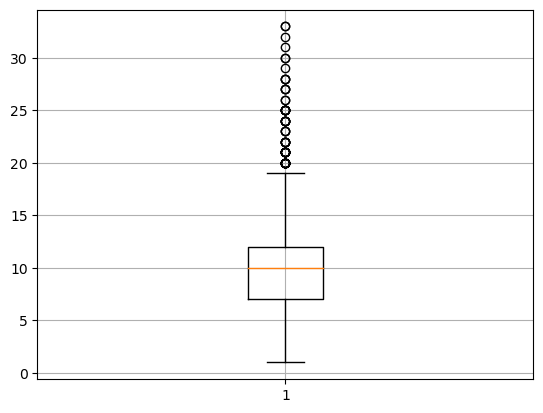

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(word_counts_train)
plt.grid(True)
plt.show()

In [10]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
stop_words = stopwords.words('english')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()

In [12]:
def data_preprocessing(review):
    
    # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) # remove html tags
    review = re.sub('[^A-Za-z0-9]+', ' ', review) # taking only words
    
    # lowercase
    review = review.lower()
    
    # tokenization
    tokens = nltk.word_tokenize(review)
    
    # stop word removal
    review = [word for word in tokens if word not in stop_words]
    
    # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
    
    # join words in preprocessed review
    review = ' '.join(review)
    
    return review

In [13]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mai5279\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
train_df['preprocessed_title'] = train_df['title'].apply(lambda review: data_preprocessing(review))
train_df

,title,true,preprocessed_title
0,Newly-Identified Coronavirus 2019-nCoV: Here’s...,1,newly identified coronavirus 2019 ncov need know
1,China travel ban 'vital' in preventing 2019-nC...,1,china travel ban vital preventing 2019 ncov ou...
2,B.C. confirms first case of coronavirus 2019-nCoV,1,b c confirms first case coronavirus 2019 ncov
3,Kash Doll makes a racist anti-asian joke about...,0,kash doll make racist anti asian joke corona v...
4,DOH now monitoring two other PUIs in Cebu City...,1,doh monitoring two puis cebu city suspected 20...
...,...,...,...
2489,Military doctors receive COVID-19 aid from China,1,military doctor receive covid 19 aid china
2490,‘Corona beer virus’ searches up after confusio...,1,corona beer virus search confusion coronavirus
2491,7 Tips to protect your family from Corona Viru...,0,7 tip protect family corona virus chennai
2492,The novel coronavirus (2019-nCoV) is spreading...,1,novel coronavirus 2019 ncov spreading quickly


In [15]:
val_df['preprocessed_title'] = val_df['title'].apply(lambda review: data_preprocessing(review))
val_df

,title,true,preprocessed_title
0,Top Guidelines Of corona virus reddit,1,top guideline corona virus reddit
1,2019 Novel Corona Virus(2019-nCoV),1,2019 novel corona virus 2019 ncov
2,AI Helping to Inform on the Corona Virus Outbreak,1,ai helping inform corona virus outbreak
3,"‘Corona won’t affect chickens’, Health News",0,corona affect chicken health news
4,Dr. Brownstein: Corona Virus is Nothing New – ...,0,dr brownstein corona virus nothing new
...,...,...,...
619,TWO SEPARATE REPORTS CONFIRM ‘MOST INTEL AGENC...,0,two separate report confirm intel agency u bel...
620,We are ready for Corona virus should it arrive,1,ready corona virus arrive
621,Manila Corona Virus Feb 7,0,manila corona virus feb 7
622,Only 10% Of Pulses Promised Under COVID-19 Rel...,0,10 pulse promised covid 19 relief package dist...


In [16]:
val_df_liar['preprocessed_title'] = val_df_liar['statement'].apply(lambda review: data_preprocessing(review))
val_df_fnd['preprocessed_title'] = val_df_fnd['title'].apply(lambda review: data_preprocessing(review))
val_df_fnn['preprocessed_title'] = val_df_fnn['title'].apply(lambda review: data_preprocessing(review))
val_df_isot['preprocessed_title'] = val_df_isot['title'].apply(lambda review: data_preprocessing(review))

print('ISOT length:', len(val_df_isot))
print('LIAR length:', len(val_df_liar))
print('FakeNewsDataset length:', len(val_df_fnd))
print('FakeNewsNet length:', len(val_df_fnn))
print('Covid-19 length:', len(val_df))

ISOT length: 8980
LIAR length: 1589
FakeNewsDataset length: 4048
FakeNewsNet length: 4639
Covid-19 length: 624


In [17]:
X_val_liar = val_df_liar['preprocessed_title']
y_val_liar = val_df_liar['label']

X_val_fnd = val_df_fnd['preprocessed_title']
y_val_fnd = val_df_fnd['true']

X_val_fnn = val_df_fnn['preprocessed_title']
y_val_fnn = val_df_fnn['true']

X_val_isot = val_df_isot['preprocessed_title']
y_val_isot = val_df_isot['true']

In [18]:
X_train = train_df['preprocessed_title']
X_val = val_df['preprocessed_title']

y_train = train_df['true']
y_val = val_df['true']

print('Train data:', X_train.shape, y_train.shape)
print('Test data:', X_val.shape, y_val.shape)

Train data: (2494,) (2494,)
Test data: (624,) (624,)


In [19]:
# vectorizing text data: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_news_tfidf = vectorizer.fit_transform(X_train)
X_val_news_tfidf = vectorizer.transform(X_val)

print('X_train_new_tfidf shape:', X_train_news_tfidf.shape)
print('X_test_news_tfidf shape:', X_val_news_tfidf.shape)

X_train_new_tfidf shape: (2494, 265)
X_test_news_tfidf shape: (624, 265)


In [20]:
X_val_liar_tfidf = vectorizer.transform(X_val_liar)
X_val_fnd_tfidf = vectorizer.transform(X_val_fnd)
X_val_fnn_tfidf = vectorizer.transform(X_val_fnn)
X_val_isot_tfidf = vectorizer.transform(X_val_isot)

In [21]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = MultinomialNB(alpha=1)
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val, y_pred))

F1 scores: 
ISOT: 0.5862996688741723
LIAR: 0.6602652034750801
FakeNewsDataset: 0.7345924453280318
FakeNewsNet: 0.81272271347499
Covid-19: 0.7951002227171493


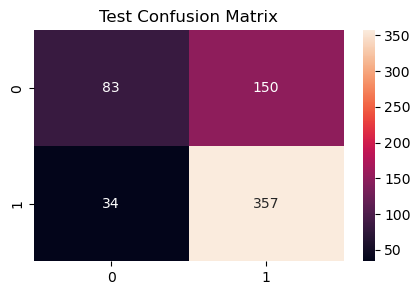

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val, y_pred))

F1 scores: 
ISOT: 0.0354180676978256
LIAR: 0.03329633740288568
FakeNewsDataset: 0.013164556962025316
FakeNewsNet: 0.016082711085583
Covid-19: 0.8004895960832313


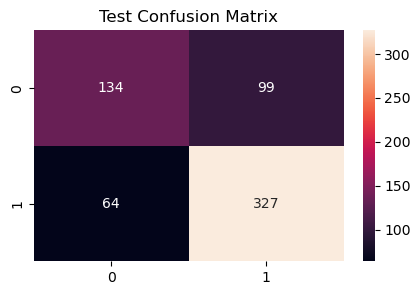

In [24]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [25]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val, y_pred))

F1 scores: 
ISOT: 0.5990443957794146
LIAR: 0.6800174140182847
FakeNewsDataset: 0.6034786007426226
FakeNewsNet: 0.84050893201388
Covid-19: 0.7947019867549668


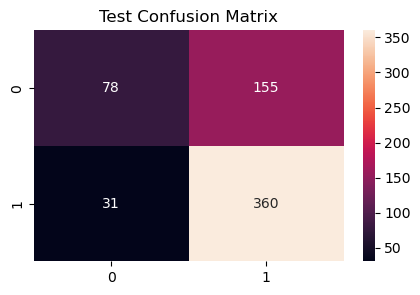

In [26]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val, y_pred))

F1 scores: 
ISOT: 0.5430663721957456
LIAR: 0.5358577165806082
FakeNewsDataset: 0.6843817787418656
FakeNewsNet: 0.7614125753660638
Covid-19: 0.7573812580231065


In [31]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_news_tfidf, y_train)

y_pred = xgb_model.predict(X_val_news_tfidf)
y_pred_liar = xgb_model.predict(X_val_liar_tfidf)
y_pred_fnd = xgb_model.predict(X_val_fnd_tfidf)
y_pred_fnn = xgb_model.predict(X_val_fnn_tfidf)
y_pred_isot = xgb_model.predict(X_val_isot_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val, y_pred))

F1 scores: 
ISOT: 0.048128342245989296
LIAR: 0.07758620689655171
FakeNewsDataset: 0.028084252758274825
FakeNewsNet: 0.007486323063633746
Covid-19: 0.7922235722964763


In [32]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train_news_tfidf, y_train)

y_pred = clf.predict(X_val_news_tfidf)
y_pred_liar = clf.predict(X_val_liar_tfidf)
y_pred_fnd = clf.predict(X_val_fnd_tfidf)
y_pred_fnn = clf.predict(X_val_fnn_tfidf)
y_pred_isot = clf.predict(X_val_isot_tfidf)

#print('Test Accuracy:', accuracy_score(y_val, y_pred))
print('F1 scores: ')
print('ISOT:', f1_score(y_val_isot, y_pred_isot))
print('LIAR:', f1_score(y_val_liar, y_pred_liar))
print('FakeNewsDataset:', f1_score(y_val_fnd, y_pred_fnd))
print('FakeNewsNet:', f1_score(y_val_fnn, y_pred_fnn))
print('Covid-19:', f1_score(y_val, y_pred))

F1 scores: 
ISOT: 0.4979891175774781
LIAR: 0.6473709599614086
FakeNewsDataset: 0.48906337633202474
FakeNewsNet: 0.5198958720714021
Covid-19: 0.8023668639053255
